In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
cd ~/Documents/Github/GSTEM/data/sampledata

/Users/catherinezhou/Documents/GitHub/GSTEM/data/sampledata


In [3]:
#change the data path here
data = pd.read_csv("train.csv", index_col = 0)

In [65]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [66]:
# Other analysis
# https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python 

data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


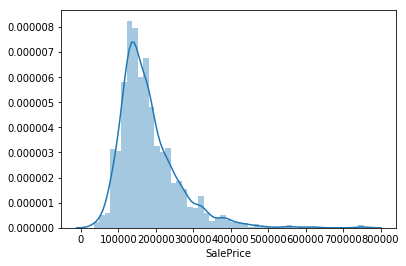

In [64]:
sns.distplot(data['SalePrice']);

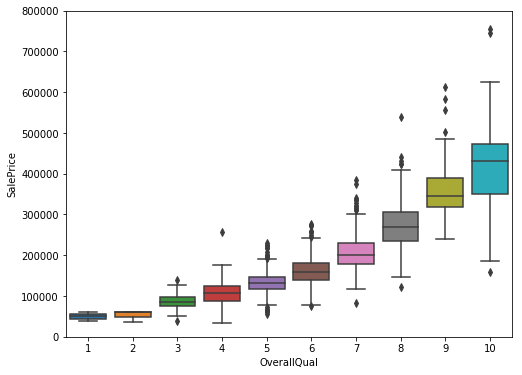

In [65]:
# Relationship w/ categorical features

var = 'OverallQual'
datal = pd.concat([data['SalePrice'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

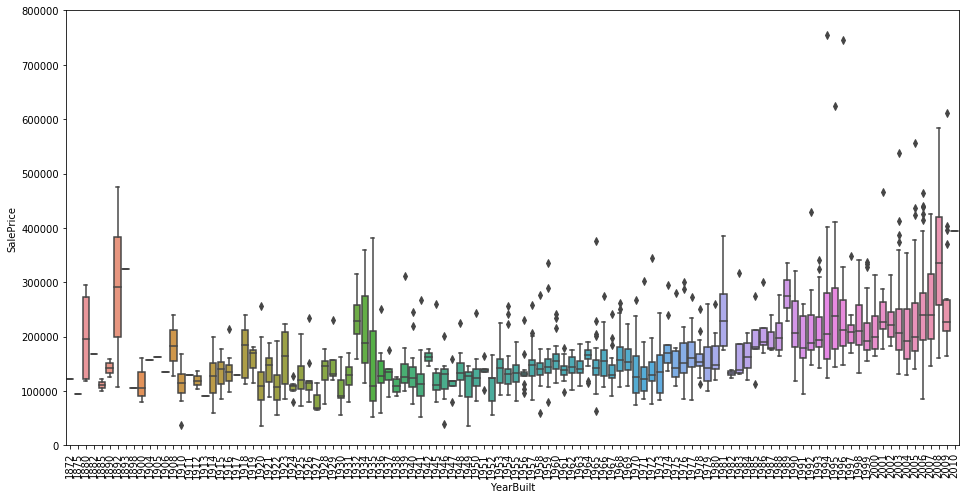

In [66]:
var = 'YearBuilt'
datal = pd.concat([data['SalePrice'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

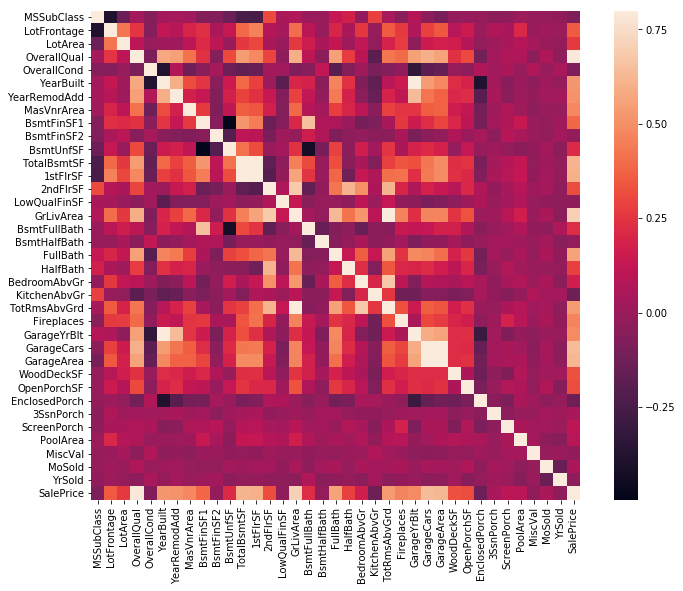

In [67]:
# Correlation matrix

corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

# You can tell that the correlation between the variables 
# TotalBsmtSF and 1stFlrSf are strong 

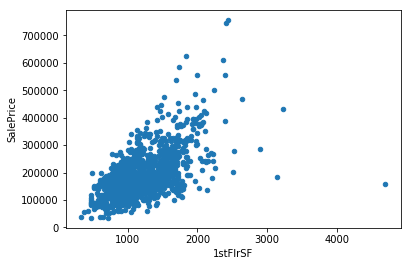

In [5]:
%matplotlib inline
data.plot(x = "1stFlrSF", y = "SalePrice", kind = 'scatter')

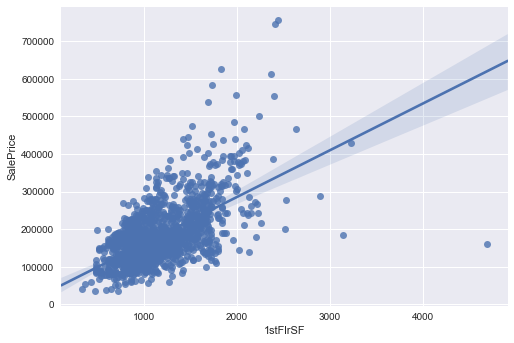

In [9]:
sns.regplot(data["1stFlrSF"], data["SalePrice"])

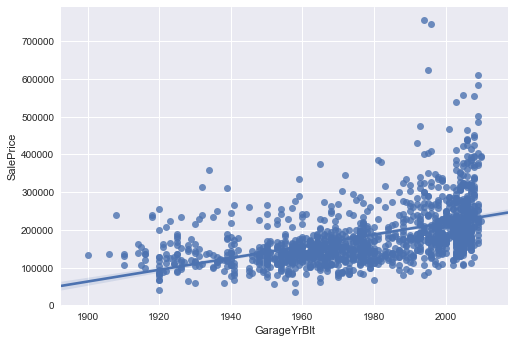

In [10]:
sns.regplot(data["GarageYrBlt"], data["SalePrice"])
# Not a good predictor 

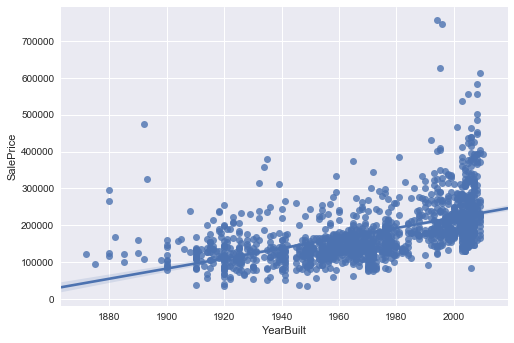

In [11]:
sns.regplot(data["YearBuilt"], data["SalePrice"])

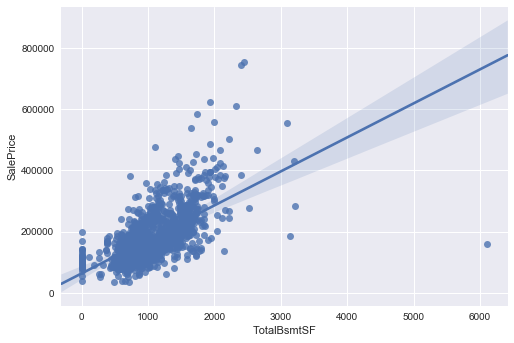

In [12]:
sns.regplot(data["TotalBsmtSF"], data["SalePrice"])

Coefficients: 
 [[1282.51783795]]
Root Mean squared error (RMSE): 72772.10


Text(0,0.5,'Selling Price')

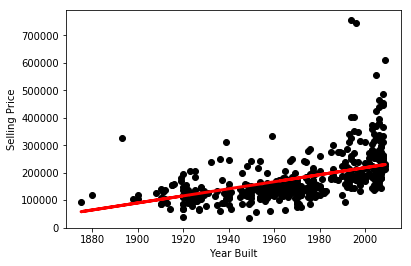

In [67]:
# Set x and y axes 
x = data[["YearBuilt"]]
y = data[['SalePrice']]

# Split the data 
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.33, random_state = 42)
# 0.33 = 33% saved for testing set 
# 0.67 = 67% saved for training and validation 

# Fitting model for training set
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print('Coefficients: \n', regr.coef_) 

print("Root Mean squared error (RMSE): %.2f" % np.sqrt(np.mean((regr.predict(x_validation) - y_validation) ** 2)))
#print("Mean squared error (RMSE): %.2f" % np.sqrt(mean_squared_error(y_validation,regr.predict(x_validation))))
#print('R^2: %.2f' % regr.score(x_train, y_train))

# Apply same model to validation set and set trend line  
ax = plt.subplot(111)
plt.scatter(x_validation, y_validation, color = 'black')
plt.plot(x_validation, regr.predict(x_validation), color = 'red', linewidth = 3)
ax.set_xlabel("Year Built")
ax.set_ylabel("Selling Price")

Coefficients: 
 [[43696.47641718]]
Root Mean squared error (RMSE): 51746.72


Text(0,0.5,'Selling Price')

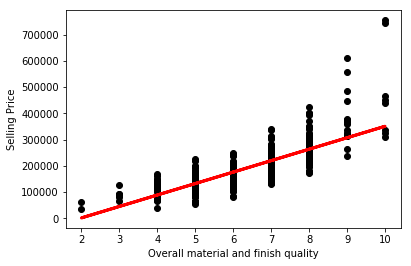

In [5]:
x = data[["OverallQual"]]
y = data[['SalePrice']]

x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.33, random_state = 42)

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print('Coefficients: \n', regr.coef_)
print("Root Mean squared error (RMSE): %.2f" % np.sqrt(np.mean((regr.predict(x_validation) - y_validation) ** 2)))
#print("Mean squared error (RMSE): %.2f" % np.sqrt(mean_squared_error(y_validation,regr.predict(x_validation))))
#print('R^2: %.2f' % regr.score(x_train, y_train))


ax = plt.subplot(111)
plt.scatter(x_validation, y_validation, color = 'black')
plt.plot(x_validation, regr.predict(x_validation), color = 'red', linewidth = 3)
ax.set_xlabel("Overall material and finish quality")
ax.set_ylabel("Selling Price")


Coefficients: 
 [[98.50395317]]
Root Mean squared error (RMSE): 56577.61


Text(0,0.5,'Selling Price')

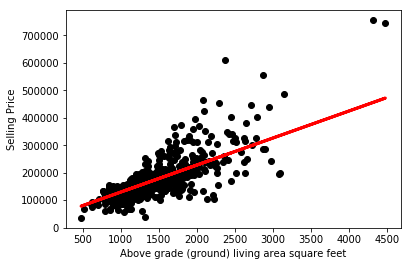

In [68]:
x = data[["GrLivArea"]]
y = data[['SalePrice']]

x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.33, random_state = 42)

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print('Coefficients: \n', regr.coef_)
print("Root Mean squared error (RMSE): %.2f" % np.sqrt(np.mean((regr.predict(x_validation) - y_validation) ** 2)))
#print("Mean squared error (RMSE): %.2f" % np.sqrt(mean_squared_error(y_validation,regr.predict(x_validation))))
#print('R^2: %.2f' % regr.score(x_train, y_train))

ax = plt.subplot(111)
plt.scatter(x_validation, y_validation, color = 'black')
plt.plot(x_validation, regr.predict(x_validation), color = 'red', linewidth = 3)
ax.set_xlabel("Above grade (ground) living area square feet")
ax.set_ylabel("Selling Price")

Coefficients: 
 [[226.93274858]]
Root Mean squared error (RMSE): 67299.54


Text(0,0.5,'Selling Price')

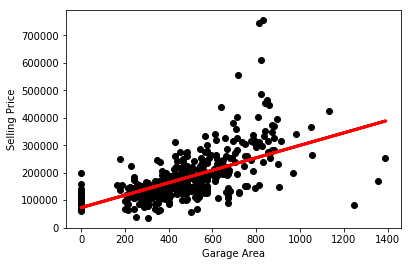

In [69]:
x = data[["GarageArea"]]
y = data[['SalePrice']]

x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.33, random_state = 42)

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print('Coefficients: \n', regr.coef_)
print("Root Mean squared error (RMSE): %.2f" % np.sqrt(np.mean((regr.predict(x_validation) - y_validation) ** 2)))
#print("Mean squared error (RMSE): %.2f" % np.sqrt(mean_squared_error(y_validation,regr.predict(x_validation))))
#print('R^2: %.2f' % regr.score(x_train, y_train))

ax = plt.subplot(111)
plt.scatter(x_validation, y_validation, color = 'black')
plt.plot(x_validation, regr.predict(x_validation), color = 'red', linewidth = 3)
ax.set_xlabel("Garage Area")
ax.set_ylabel("Selling Price")

Coefficients: 
 [[53772.7636519]]
Root Mean squared error (RMSE): 75357.51


Text(0,0.5,'Selling Price')

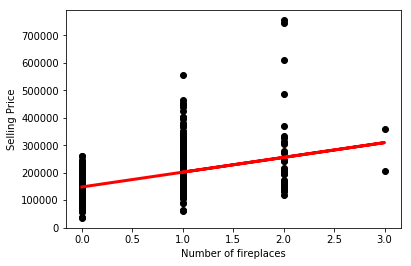

In [70]:
x = data[["Fireplaces"]]
y = data[['SalePrice']]

x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.33, random_state = 42)

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print('Coefficients: \n', regr.coef_)
print("Root Mean squared error (RMSE): %.2f" % np.sqrt(np.mean((regr.predict(x_validation) - y_validation) ** 2)))
#print("Mean squared error (RMSE): %.2f" % np.sqrt(mean_squared_error(y_validation,regr.predict(x_validation))))
#print('R^2: %.2f' % regr.score(x_train, y_train))

ax = plt.subplot(111)
plt.scatter(x_validation, y_validation, color = 'black')
plt.plot(x_validation, regr.predict(x_validation), color = 'red', linewidth = 3)
ax.set_xlabel("Number of fireplaces")
ax.set_ylabel("Selling Price")

# Surprisingly more relevant to sale price than overall condition rating (next cell)

In [12]:
# Multiple linear regression

x = data[['OverallCond', 'GrLivArea', 'Fireplaces', 'OverallQual', 'TotalBsmtSF', 'GarageArea']]
y = data[['SalePrice']]

x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.33, random_state = 42)

# Fit model to training set 
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

print('Coefficients: \n', regr.coef_)

# Calculate RMSE: essentially, how close your trained model was to the validation set 
print("Root Mean squared error (RMSE): %.2f" % np.sqrt(np.mean((regr.predict(x_validation) - y_validation) ** 2)))
#print("Mean squared error (RMSE): %.2f" % np.sqrt(mean_squared_error(y_validation,regr.predict(x_validation))))
#print('R^2: %.2f' % regr.score(x_train, y_train))

#ax = plt.subplot(111)
#plt.scatter(x_validation, y_validation, color = 'black')
#plt.plot(x_validation, regr.predict(x_validation), color = 'red', linewidth = 3)
#ax.set_xlabel("Overall condition rating")
#ax.set_ylabel("Selling Price")

Coefficients: 
 [[1.27635603e+03 3.39562325e+01 9.99388147e+03 2.49517030e+04
  2.17858607e+01 6.68456208e+01]]
Root Mean squared error (RMSE): 39365.31


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a1ad860>]],
      dtype=object)

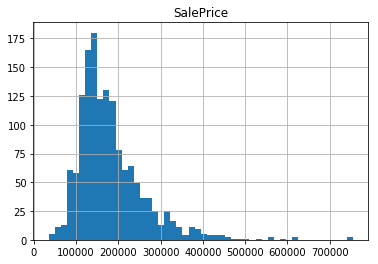

In [72]:
data.hist("SalePrice", bins = 50)

In [73]:
numericlist = data.select_dtypes(include='number')
numericlist.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [74]:
import seaborn as sns

def reg_plots(df, target):
    columns = data.select_dtypes(include=['number']).drop(target, axis= 1).columns
    col_num = len(columns)//3
    fig, axarr = plt.subplots( col_num,3, figsize=(18, 50))
    axarr = axarr.flatten()
    for i in range(len(columns)):
        sns.regplot(df[columns[i]], df[target], ax=axarr[i])

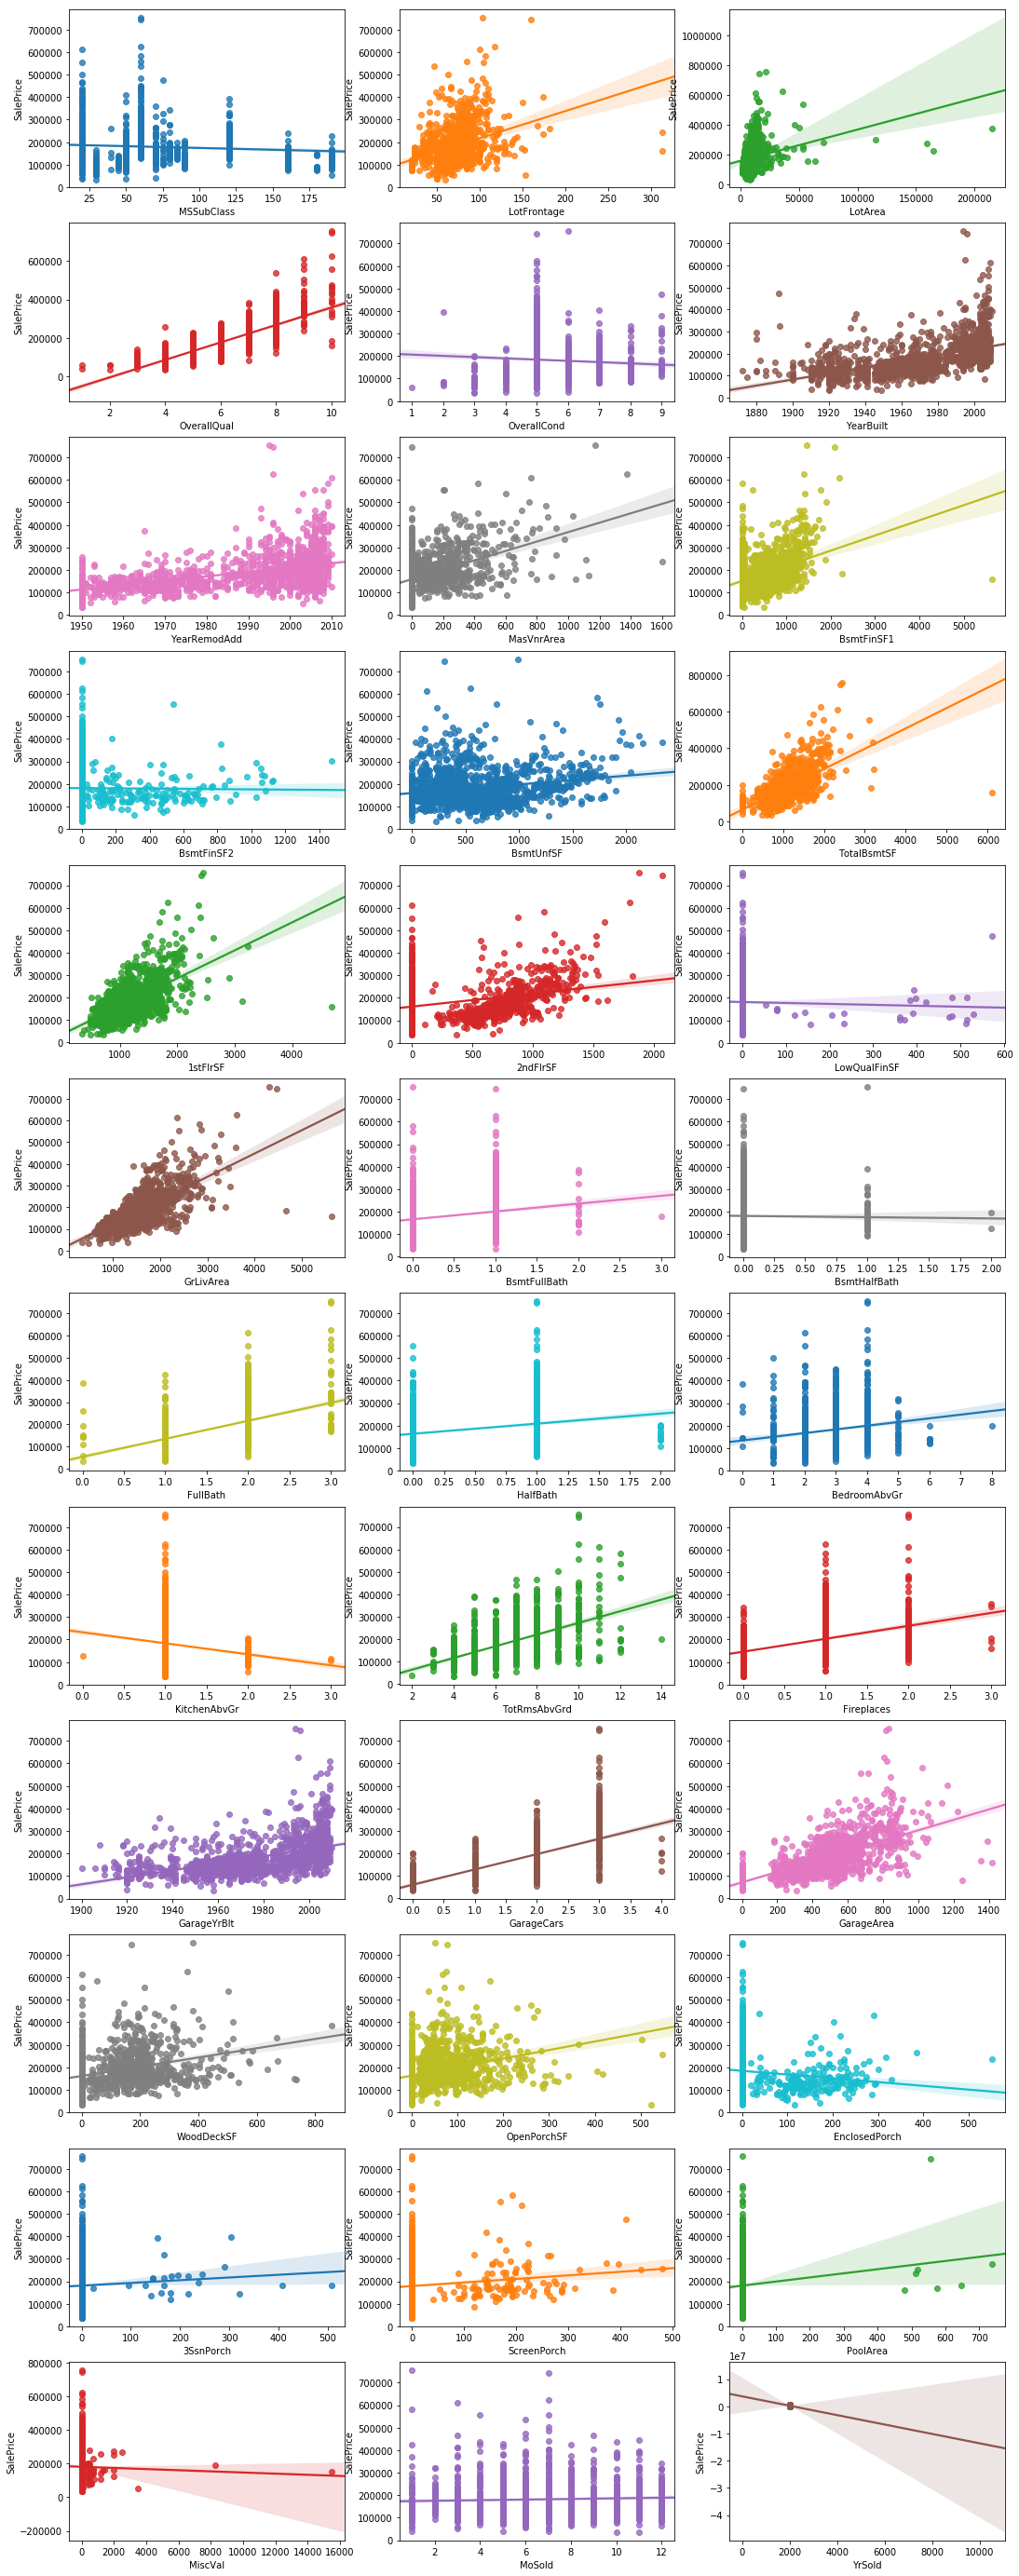

In [75]:
reg_plots(data, 'SalePrice')

In [76]:
from sklearn.metrics import mean_squared_error as mse

def calc_regression(df, target):
    columns = df.select_dtypes(include=['int64']).drop(target, axis= 1).columns
    for j, i in enumerate(columns):
        # Set x and y axes 
        X = df[[i]]
        Y = df[[target]]
        # Split the data 
        x_train, x_validation, y_train, y_validation = train_test_split(X,Y,\
                                                                        test_size = 0.33, random_state = 42)
        # Fitting model for training set
        regr = linear_model.LinearRegression()
        regr.fit(x_train, y_train)
        # predicting the target
        train_prediction = regr.predict(x_validation)
        
        #calculating the error (check if it matches with the other caculation you guys were using )
        RMSE = round(mse(y_validation, train_prediction)**0.5, 2)
        print(i, RMSE, round(regr.coef_[0][0]))

In [77]:
calc_regression(data, 'SalePrice')

# I expected the coefficients for GrLivArea and 1stFlrSF to be higher, and 
# the GarageCars coefficient to be lower 

MSSubClass 85602.31 -179.0
LotArea 83010.96 2.0
OverallQual 51746.72 43696.0
OverallCond 85347.52 -4710.0
YearBuilt 72772.1 1283.0
YearRemodAdd 75080.28 1916.0
BsmtFinSF1 77621.3 59.0
BsmtFinSF2 85676.78 -1.0
BsmtUnfSF 84077.63 39.0
TotalBsmtSF 65679.67 100.0
1stFlrSF 66128.35 114.0
2ndFlrSF 80129.34 50.0
LowQualFinSF 85664.29 -6.0
GrLivArea 56577.61 99.0
BsmtFullBath 83790.83 34788.0
BsmtHalfBath 85954.71 -16320.0
FullBath 69301.45 75603.0
HalfBath 81751.17 42050.0
BedroomAbvGr 84191.61 14482.0
KitchenAbvGr 85232.59 -54039.0
TotRmsAbvGrd 71172.6 24321.0
Fireplaces 75357.51 53773.0
GarageCars 66406.48 67063.0
GarageArea 67299.54 227.0
WoodDeckSF 81644.25 195.0
OpenPorchSF 79964.61 297.0
EnclosedPorch 85291.84 -178.0
3SsnPorch 85734.92 143.0
ScreenPorch 85461.64 174.0
PoolArea 85092.23 94.0
MiscVal 85652.83 -4.0
MoSold 85627.01 1476.0
YrSold 85635.32 -633.0


In [78]:
# Combination of both functions


def linear_regression(df, target):
    columns = df.select_dtypes(include=['int64']).drop(target, axis= 1).columns
    col_num = len(columns)//3
    fig, axarr = plt.subplots( col_num,3, figsize=(18, 50))
    axarr = axarr.flatten()
    for j, i in enumerate(columns):
        # Set x and y axes 
        X = df[[i]]
        Y = df[[target]]
        # Split the data 
        x_train, x_validation, y_train, y_validation = train_test_split(X,Y,\
                                                                        test_size = 0.33, random_state = 42)
        # Fitting model for training set
        regr = linear_model.LinearRegression()
        regr.fit(x_train, y_train)
        train_prediction = regr.predict(x_validation)
        RMSE = round(mse(y_validation, train_prediction)**0.5, 2)
        axarr[j].scatter(x_validation, y_validation, color = 'black')
        axarr[j].plot(x_validation, regr.predict(x_validation), color = 'red', linewidth = 3)
        axarr[j].set_xlabel(i)
        axarr[j].set_ylabel(target)
        axarr[j].text(0.2,0.8,"RMSE: "+ str(RMSE)+'\nCoefficients: '+str(round(regr.coef_[0][0])),\
                     transform=axarr[j].transAxes)

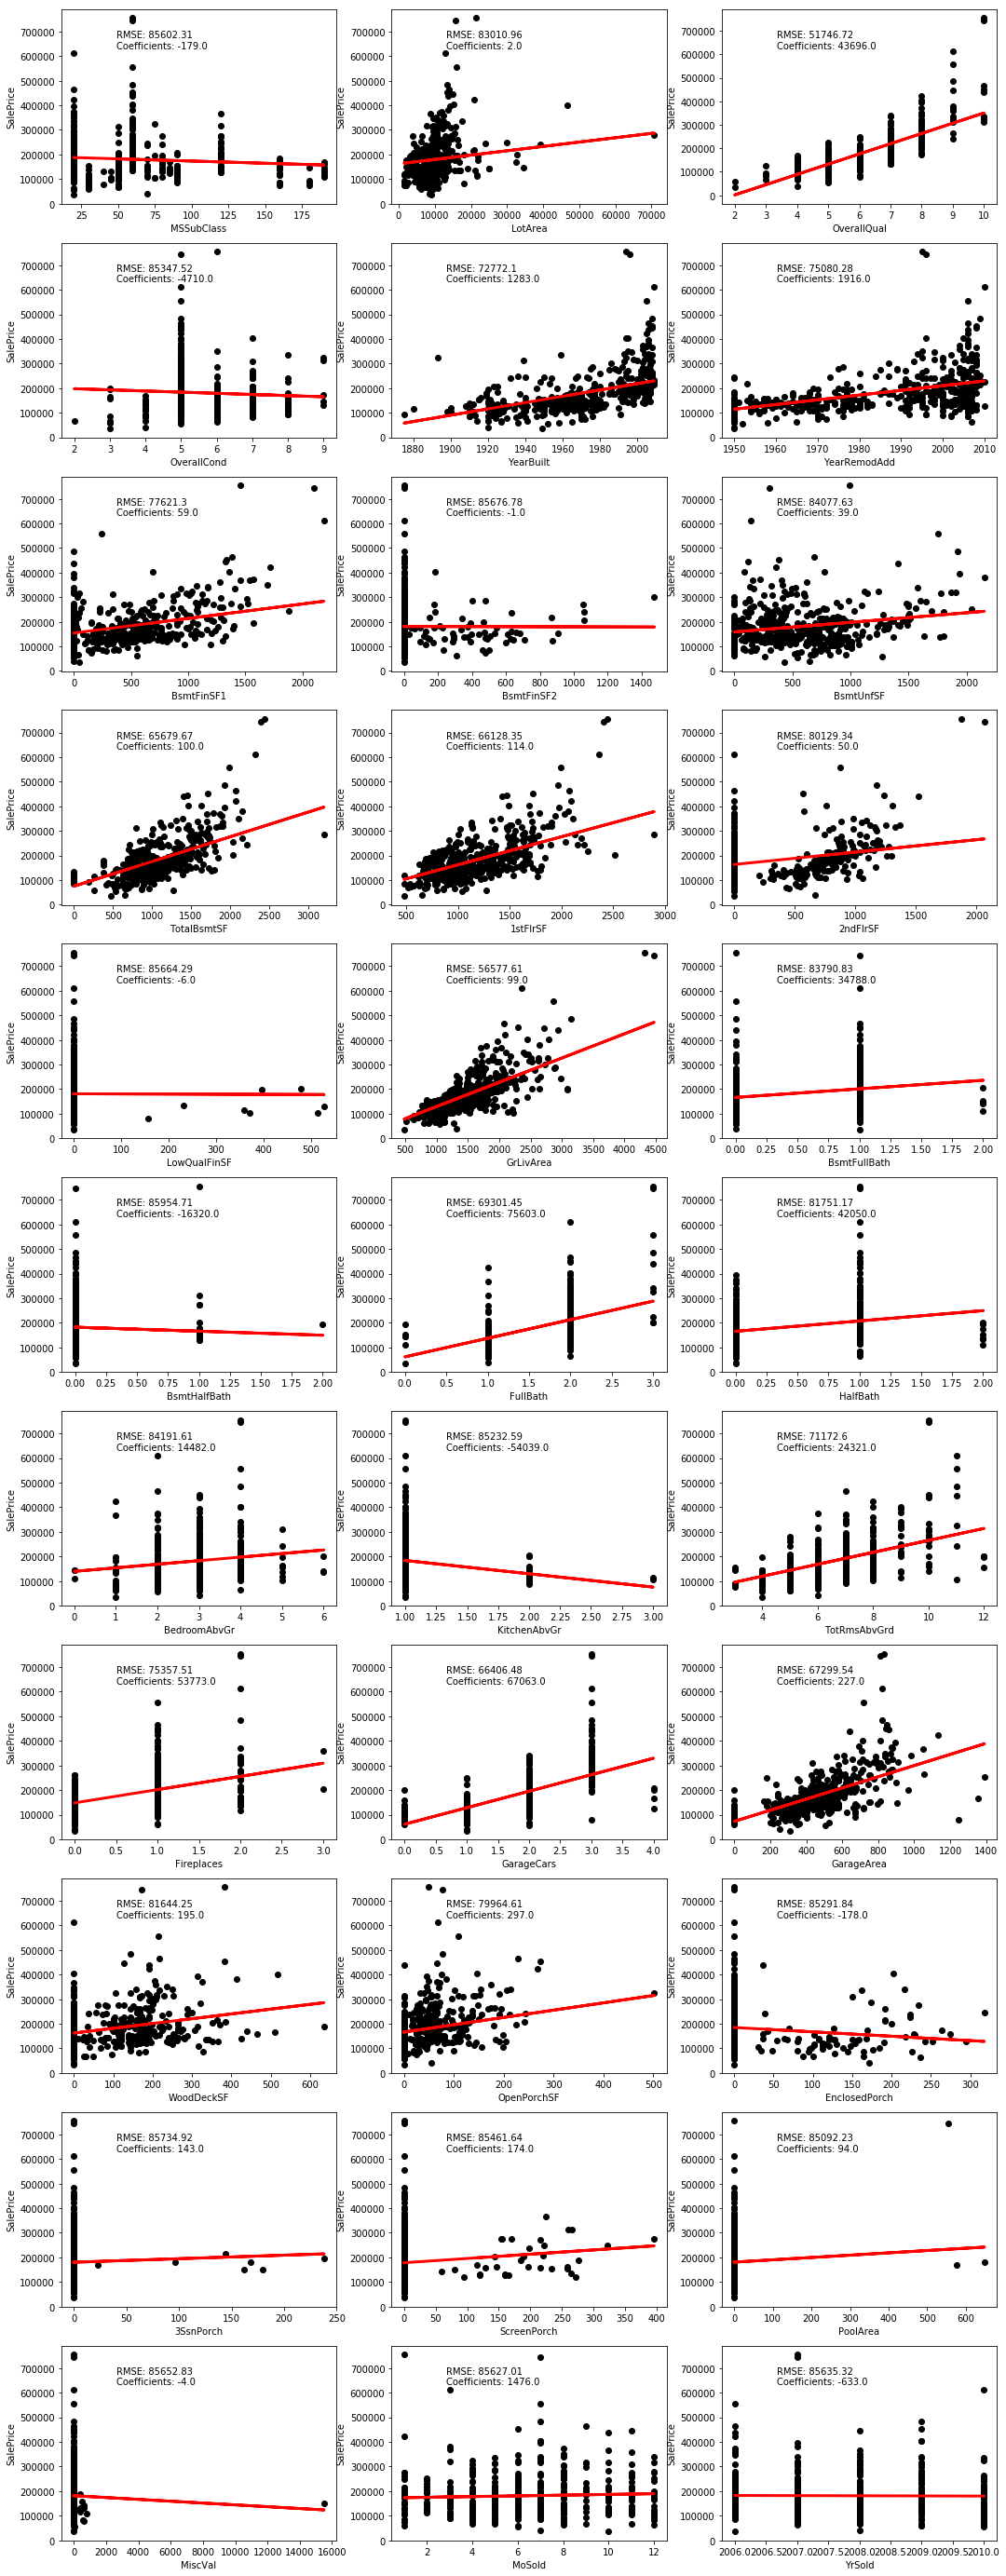

In [79]:
linear_regression(data, 'SalePrice')

In [80]:
# Write an if/else loop to filter columns with low RMSE and them use linear regression to model using all
# those variables. See if it improves the RMSE value. 


def linear_regression(df, target):
    columns = df.select_dtypes(include=['int64']).drop(target, axis= 1).columns
    col_num = len(columns)//3
    fig, axarr = plt.subplots( col_num,3, figsize=(18, 50))
    axarr = axarr.flatten()
    for j, i in enumerate(columns):
        # Set x and y axes 
        X = df[[i]]
        Y = df[[target]]
        # Split the data 
        x_train, x_validation, y_train, y_validation = train_test_split(X,Y,\
                                                                        test_size = 0.33, random_state = 42)
        # Fitting model for training set
        regr = linear_model.LinearRegression()
        regr.fit(x_train, y_train)
        train_prediction = regr.predict(x_validation)
        RMSE = round(mse(y_validation, train_prediction)**0.5, 2)
        if RMSE < 60000:
            axarr[j].scatter(x_validation, y_validation, color = 'black')
            axarr[j].plot(x_validation, regr.predict(x_validation), color = 'red', linewidth = 3)
            axarr[j].set_xlabel(i)
            axarr[j].set_ylabel(target)
            axarr[j].text(0.2,0.8,"RMSE: "+ str(RMSE)+'\nCoefficients: '+str(round(regr.coef_[0][0])),\
                     transform=axarr[j].transAxes)


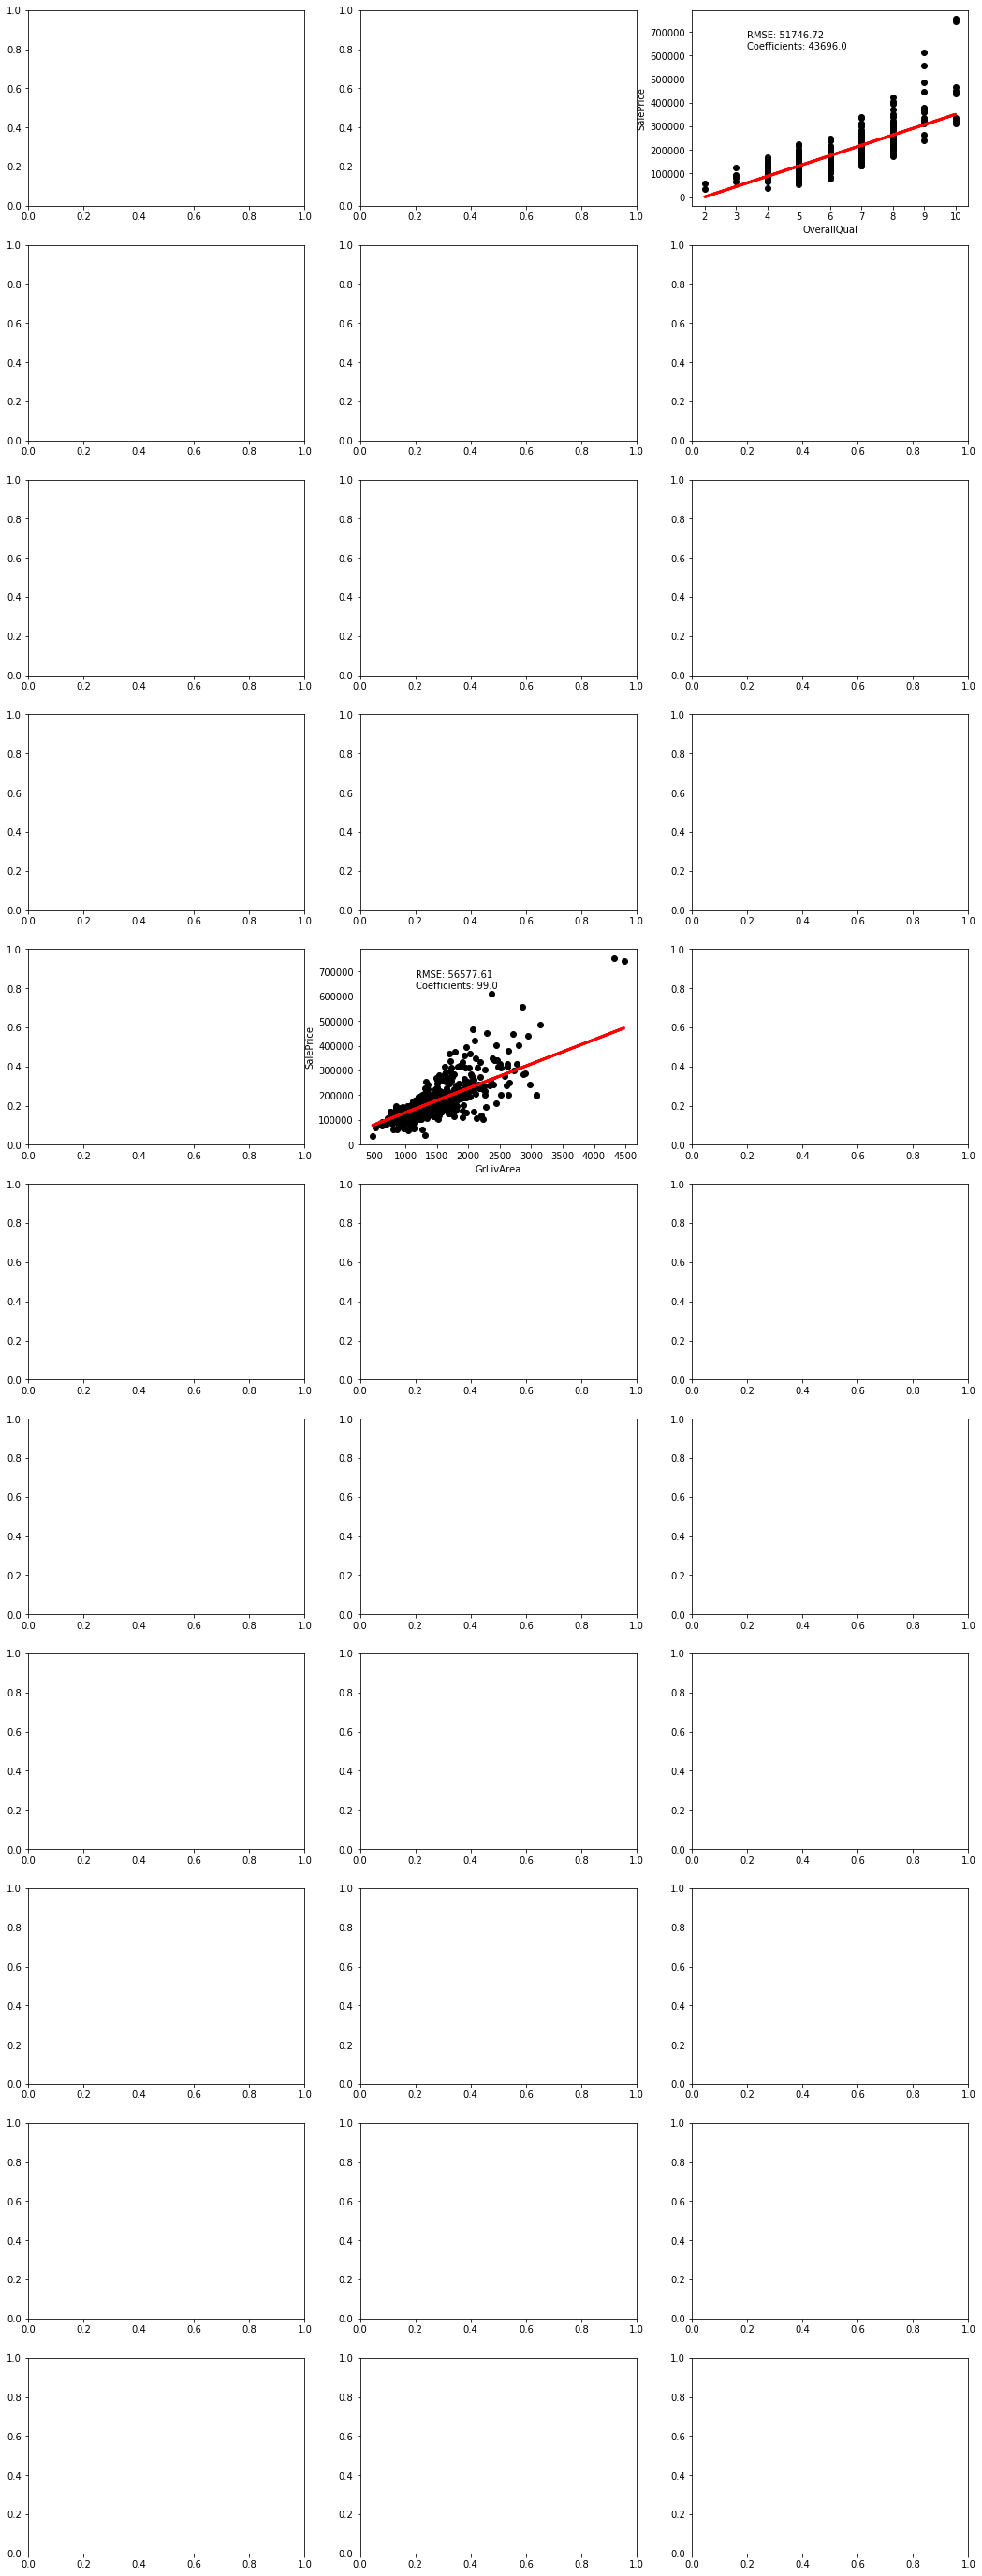

In [81]:
linear_regression(data, 'SalePrice')

In [82]:
# Submit 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline

data = pd.read_csv("train.csv")

In [83]:
# Multiple Regression

def get_mse(X, y): 
    x_train, x_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.33, random_state = 42)
    
    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)
    print('Coefficients: \n', regr.coef_)
    return np.sqrt(np.mean((regr.predict(x_validation) - y_validation) ** 2))

In [84]:
#Select all the columns that have numeric values and then remove irrelevant ones 


numeric_vars = data.select_dtypes(['float64', 'int64']).columns.tolist()
numeric_vars.remove("SalePrice")
numeric_vars.remove("Id")

#These columns are null, remove them for now
#col_has_null = data_numeric.isnull().any(axis=0)
#col_has_null[col_has_null.values]
numeric_vars.remove("LotFrontage")
numeric_vars.remove("MasVnrArea")
numeric_vars.remove("GarageYrBlt")

In [25]:
data_numeric = data[numeric_vars]

In [26]:
data_numeric.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,8450,7,5,2003,2003,706,0,150,856,...,548,0,61,0,0,0,0,0,2,2008
1,20,9600,6,8,1976,1976,978,0,284,1262,...,460,298,0,0,0,0,0,0,5,2007
2,60,11250,7,5,2001,2002,486,0,434,920,...,608,0,42,0,0,0,0,0,9,2008
3,70,9550,7,5,1915,1970,216,0,540,756,...,642,0,35,272,0,0,0,0,2,2006
4,60,14260,8,5,2000,2000,655,0,490,1145,...,836,192,84,0,0,0,0,0,12,2008


In [85]:
X = data[numeric_vars]
y = data['SalePrice'].values

In [86]:
get_mse(X, y)

Coefficients: 
 [-1.89643267e+02  4.44184537e-01  1.88346578e+04  2.57104746e+03
  3.04866038e+02  2.00263625e+02  8.22405098e+00 -5.32677687e+00
 -7.48802534e-01  2.14847158e+00  5.00241445e+00  2.12317834e+00
  2.61949034e+01  3.33204962e+01  1.17025698e+04  8.53564215e+02
  5.53042960e+03  3.42789352e+02 -9.91718519e+03 -1.11625663e+04
  6.88965298e+03  4.85557582e+03  1.20438394e+04  4.13721311e+00
  2.95824758e+01 -1.19117287e+01  1.18417926e+01  4.91685105e+01
  9.19640196e+01 -1.65335304e+02 -1.46567276e+00 -9.87825865e+01
 -1.05147165e+02]


40129.80562567458

In [43]:
def multi_variate_linear_reg(df, columns,target):
    '''
        trains a linear regression model on train set and returns AUC on test set
    '''
    X = df[columns]
    Y = df[target]
    x_train, x_validation, y_train, y_validation = train_test_split(X,Y,\
                                                                test_size = 0.33, random_state = 42)
    
    # Fitting model for training set
    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)
    train_prediction = regr.predict(x_validation)
    RMSE = round(mse(y_validation, train_prediction)**0.5, 2)
    return RMSE

In [46]:
multi_variate_linear_reg(data, ['OverallCond', 'GrLivArea', 'Fireplaces', 'OverallQual', 'TotalBsmtSF', 'GarageArea']
,['SalePrice'])

39365.31

In [4]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

In [53]:
x = data[['OverallCond', 'GrLivArea', 'Fireplaces', 'OverallQual', 'TotalBsmtSF', 'GarageArea']]
y = data[['SalePrice']]

x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.33, random_state = 42)

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [76]:
test = pd.read_csv('test.csv')
predictor_cols = ['OverallCond', 'GrLivArea', 'Fireplaces', 'OverallQual', 'TotalBsmtSF', 'GarageArea']

for i in predictor_cols:
    if(sum(test[i].isnull())>0):
        test[i].fillna(0, inplace=True)
        test[i].astype(int)

test_X = test[predictor_cols]

In [1]:
# Apply the models
predicted_prices = regr.predict(test_X)

NameError: name 'regr' is not defined

In [78]:
print(predicted_prices)

[[139201.00594956]
 [160652.56787399]
 [157232.88544374]
 ...
 [158765.42646133]
 [ 92293.68375844]
 [232445.55656383]]


In [79]:
predicted_prices = predicted_prices.ravel()

In [80]:
predicted_prices

array([139201.00594956, 160652.56787399, 157232.88544374, ...,
       158765.42646133,  92293.68375844, 232445.55656383])

In [81]:
submission = pd.DataFrame({'Id': test.Id, 'SalePrice': predicted_prices})

In [68]:
submission.to_csv('submission.csv', index=False)

In [70]:
# Categorical Variables

pd.get_dummies(data)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,0,0,0,1,0,0,0,0,1,0
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,0,0,0,1,0,0,0,0,1,0
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,...,0,0,0,1,0,0,0,0,1,0
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,0,0,0,1,1,0,0,0,0,0
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,...,0,0,0,1,0,0,0,0,1,0


In [103]:
categorical_list = data.select_dtypes(include='object')

In [104]:
numeric_list = data.select_dtypes(include='number')

In [106]:
categorical_list.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [107]:
numeric_list.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [108]:
cols_to_transform = categorical_list.columns

In [111]:
df_with_dummies = pd.get_dummies(data, columns = cols_to_transform)

In [121]:
df_with_dummies

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,0,0,0,1,0,0,0,0,1,0
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,0,0,0,1,0,0,0,0,1,0
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,...,0,0,0,1,0,0,0,0,1,0
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,0,0,0,1,1,0,0,0,0,0
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,...,0,0,0,1,0,0,0,0,1,0


In [13]:
# Try checking for a correlation between predictor variables
data.corr(method='pearson', min_periods = 2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
